In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:

# Load the RNA-seq data
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/tcga.brca.rnaseq.unstranded.fpkm.counts.matrix.txt', sep='\t', index_col=0)

# Load the HRD score data
hrd_df = pd.read_excel('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/tcga.hrdscore.xlsx')

# Load the BRCA status data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/toga.breast.brca.status.txt', sep='\t', index_col=0)


In [54]:
# Take the first 10 rows
rnaseq_sample = rnaseq_df.head(10)
hrd_sample = hrd_df.head(10)
brca_sample = brca_df.head(10)
# Save the sample as a TSV file
rnaseq_sample.to_csv("data/sample/rnaseq_sample.tsv", sep='\t', index=True)
hrd_sample.to_csv("data/sample/hrd_sample.tsv", sep='\t', index=True)
brca_sample.to_csv("data/sample/brca_sample.tsv", sep='\t', index=True)

### RNA-Seq analysis

In [55]:

# Display the first few rows of each dataframe
print("RNA-seq data:")
print(rnaseq_df.shape)
rnaseq_df.head()


RNA-seq data:
(1231, 60663)


,Case ID,Sample ID,Sample Type,ENSG00000000003.15|TSPAN6|protein_coding,ENSG00000000005.6|TNMD|protein_coding,ENSG00000000419.13|DPM1|protein_coding,ENSG00000000457.14|SCYL3|protein_coding,ENSG00000000460.17|C1orf112|protein_coding,ENSG00000000938.13|FGR|protein_coding,ENSG00000000971.16|CFH|protein_coding,...,ENSG00000288661.1|AL451106.1|protein_coding,ENSG00000288662.1|AC092910.4|lncRNA,ENSG00000288663.1|AC073611.1|lncRNA,ENSG00000288665.1|AC136977.1|lncRNA,ENSG00000288667.1|AC078856.1|lncRNA,ENSG00000288669.1|AC008763.4|protein_coding,ENSG00000288670.1|AL592295.6|lncRNA,ENSG00000288671.1|AC006486.3|protein_coding,ENSG00000288674.1|AL391628.1|protein_coding,ENSG00000288675.1|AP006621.6|protein_coding
0,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,1.0276,0.0000,74.2709,1.3816,1.6749,1.4166,5.2410,...,0.0,0.0000,0.0177,0.0,0.0000,0.0000,1.8073,0.0,0.0000,0.1285
1,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,13.2684,0.1250,37.9298,3.7360,3.1045,2.4799,7.4851,...,0.0,0.0000,0.0847,0.0,0.0000,0.0036,3.4634,0.0,0.0074,0.3801
2,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,Solid Tissue Normal,12.8007,8.4777,21.6363,2.4554,0.5852,2.7533,27.4655,...,0.0,0.2708,0.0456,0.0,0.2664,0.0041,5.8816,0.0,0.0372,0.1064
3,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,14.8681,2.2172,27.8838,4.3170,1.7847,3.7167,9.6630,...,0.0,0.0000,0.0261,0.0,0.0000,0.0000,3.2723,0.0,0.0058,0.2546
4,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,0.8430,0.0798,22.1105,3.9971,0.9805,2.4742,3.8185,...,0.0,0.0000,0.0253,0.0,0.0000,0.0000,3.1233,0.0,0.0041,0.4599


### HRD Score Analysis

In [56]:

print("\nHRD score data:")
print(hrd_df.shape)
hrd_df.head()



HRD score data:
(9604, 5)


,sample,HRD,Telomeric AI,LST,HRD-sum
0,TCGA-02-0001,5,6,8,19
1,TCGA-02-0003,1,3,4,8
2,TCGA-02-0006,0,2,8,10
3,TCGA-02-0007,8,6,4,18
4,TCGA-02-0009,1,4,2,7


In [57]:

hrd_df['HRD'].value_counts()

HRD
2     1130
1     1129
0     1037
3      963
4      834
5      663
6      610
7      524
8      490
9      405
10     369
11     293
12     226
13     210
14     171
15     147
16      94
17      79
18      57
19      40
20      36
21      29
22      23
23      16
24      10
29       4
26       3
28       3
25       3
27       2
30       2
33       1
31       1
Name: count, dtype: int64

In [58]:
hrd_df['Telomeric AI'].value_counts()

Telomeric AI
0     877
2     809
1     758
3     665
4     563
5     510
6     478
7     449
8     382
9     359
10    322
11    311
12    282
13    259
14    237
17    219
15    213
18    198
16    198
19    190
21    168
20    162
22    151
23    143
24    118
25    116
26     88
27     79
28     66
29     65
30     47
31     41
32     27
33     23
34     20
35      9
36      1
38      1
Name: count, dtype: int64

In [59]:
hrd_df['LST'].value_counts()

LST
0     1276
2      958
1      911
3      765
4      671
5      610
6      519
7      503
8      462
9      362
10     345
11     295
12     273
13     224
14     197
15     169
16     141
17     118
18      96
20      70
19      63
21      61
22      59
23      54
26      44
24      43
27      38
28      33
25      33
30      30
29      28
31      25
32      22
34      18
36      18
33      16
35      13
37      10
40       7
39       7
41       6
38       5
44       2
42       2
47       1
48       1
Name: count, dtype: int64

In [60]:
hrd_df['HRD-sum'].value_counts()

HRD-sum
0      582
3      367
4      349
5      346
6      301
      ... 
101      1
96       1
95       1
94       1
100      1
Name: count, Length: 98, dtype: int64

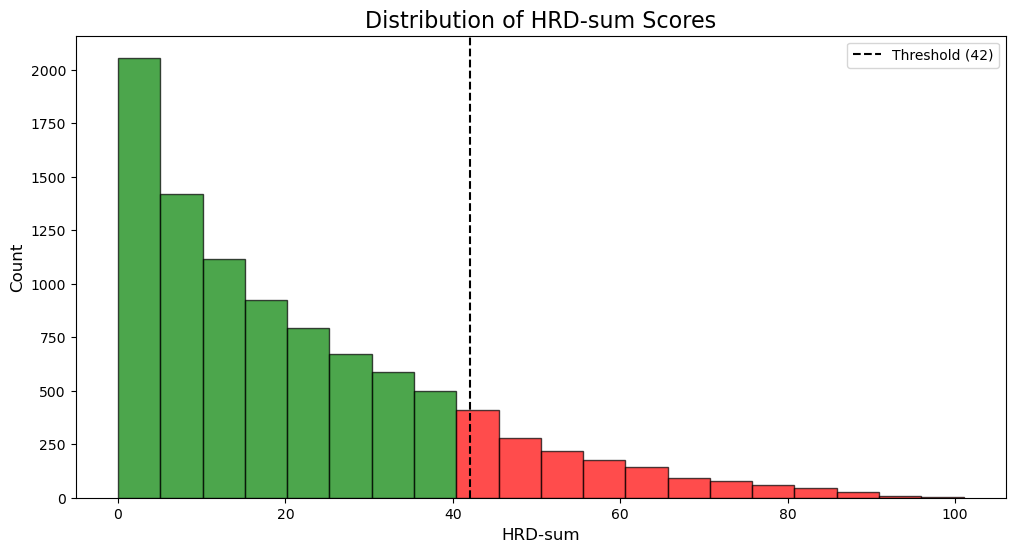

Summary Statistics of HRD-sum:
count    9604.000000
mean       21.605789
std        18.726845
min         0.000000
25%         7.000000
50%        17.000000
75%        32.000000
max       101.000000
Name: HRD-sum, dtype: float64

Median HRD-sum:
17.0

Percentage of samples with HRD-sum <= 42: 85.84%
Percentage of samples with HRD-sum > 42: 14.16%


In [61]:
# Create the plot
plt.figure(figsize=(12, 6))

# Create histogram
hist, bins, _ = plt.hist(hrd_df['HRD-sum'], bins=20, edgecolor='black', alpha=0)

# Color the bars
for i in range(len(bins) - 1):
    left = bins[i]
    right = bins[i+1]
    middle = (left + right) / 2
    color = 'green' if middle <= 42 else 'red'
    plt.bar(middle, hist[i], width=(right - left), color=color, edgecolor='black', alpha=0.7)

# Add a vertical line at x=42
plt.axvline(x=42, color='black', linestyle='--', label='Threshold (42)')

# Customize the plot
plt.title('Distribution of HRD-sum Scores', fontsize=16)
plt.xlabel('HRD-sum', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Print summary statistics
print("Summary Statistics of HRD-sum:")
print(hrd_df['HRD-sum'].describe())
print("\nMedian HRD-sum:")
print(hrd_df['HRD-sum'].median())

# Calculate and print percentages
total_count = len(hrd_df)
low_hrd_count = (hrd_df['HRD-sum'] <= 42).sum()
high_hrd_count = (hrd_df['HRD-sum'] > 42).sum()

print(f"\nPercentage of samples with HRD-sum <= 42: {low_hrd_count / total_count * 100:.2f}%")
print(f"Percentage of samples with HRD-sum > 42: {high_hrd_count / total_count * 100:.2f}%")

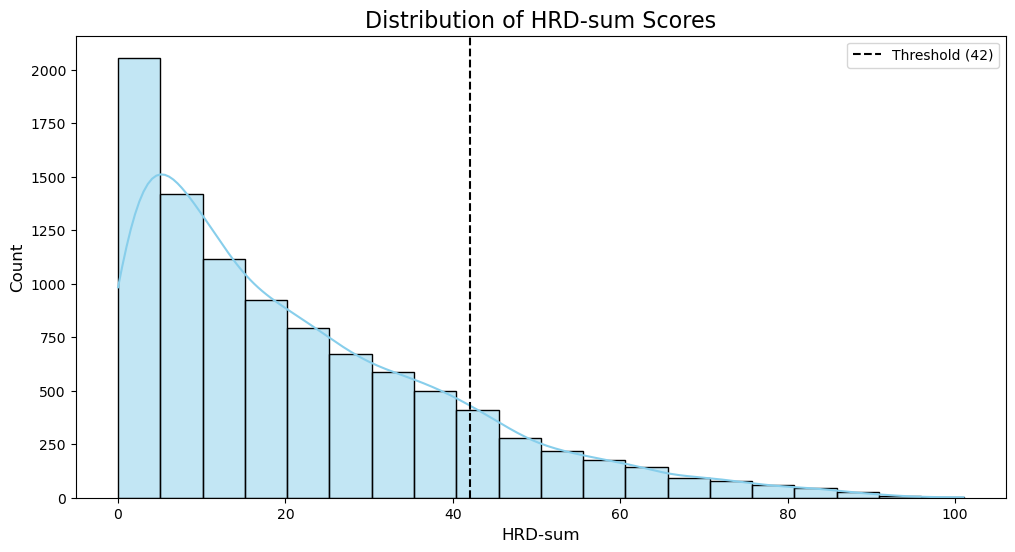

In [62]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(data=hrd_df, x='HRD-sum', bins=20, kde=True, color='skyblue', edgecolor='black')
# Add a vertical line at x=42
plt.axvline(x=42, color='black', linestyle='--', label='Threshold (42)')
# Customize the plot
plt.title('Distribution of HRD-sum Scores', fontsize=16)
plt.xlabel('HRD-sum', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Show the plot
plt.show()

/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_19729/2714113178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hrd_df, x='HRD_category', y='HRD-sum',


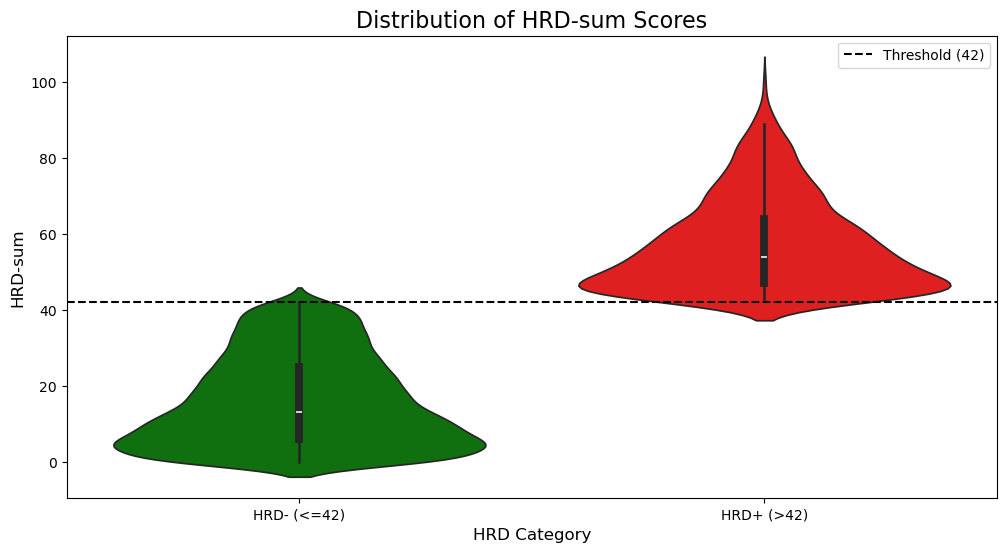

Summary Statistics of HRD-sum:
count    9604.000000
mean       21.605789
std        18.726845
min         0.000000
25%         7.000000
50%        17.000000
75%        32.000000
max       101.000000
Name: HRD-sum, dtype: float64

Percentage of samples with HRD-sum <= 42: 85.84%
Percentage of samples with HRD-sum > 42: 14.16%

Median HRD-sum for HRD- category: 13.00
Median HRD-sum for HRD+ category: 54.00


In [63]:
# Create a new column for categorization
hrd_df['HRD_category'] = np.where(hrd_df['HRD-sum'] <= 42, 'HRD- (<=42)', 'HRD+ (>42)')

# Create the plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=hrd_df, x='HRD_category', y='HRD-sum', 
               order=['HRD- (<=42)', 'HRD+ (>42)'],
               palette={'HRD- (<=42)': 'green', 'HRD+ (>42)': 'red'})

# Customize the plot
plt.title('Distribution of HRD-sum Scores', fontsize=16)
plt.xlabel('HRD Category', fontsize=12)
plt.ylabel('HRD-sum', fontsize=12)

# Add a horizontal line at y=42
plt.axhline(y=42, color='black', linestyle='--', label='Threshold (42)')

# Show the plot
plt.legend()
plt.show()

# Print summary statistics
print("Summary Statistics of HRD-sum:")
print(hrd_df['HRD-sum'].describe())

# Calculate and print percentages
total_count = len(hrd_df)
low_hrd_count = (hrd_df['HRD-sum'] <= 42).sum()
high_hrd_count = (hrd_df['HRD-sum'] > 42).sum()

print(f"\nPercentage of samples with HRD-sum <= 42: {low_hrd_count / total_count * 100:.2f}%")
print(f"Percentage of samples with HRD-sum > 42: {high_hrd_count / total_count * 100:.2f}%")

# Calculate and print median values for each category
low_hrd_median = hrd_df[hrd_df['HRD-sum'] <= 42]['HRD-sum'].median()
high_hrd_median = hrd_df[hrd_df['HRD-sum'] > 42]['HRD-sum'].median()

print(f"\nMedian HRD-sum for HRD- category: {low_hrd_median:.2f}")
print(f"Median HRD-sum for HRD+ category: {high_hrd_median:.2f}")

### BRCA status analysis

In [64]:

print("\nBRCA status data:")
print(brca_df.shape)
brca_df.index = brca_df.index.str.replace('.', '-')
brca_df.head()


BRCA status data:
(992, 33)


,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,BRCA1_mRNA,BRCA2_somatic_null,BRCA2_germ_bi_allelic,BRCA2_germ_undetermined,BRCA2_germ_mono_allelic,...,H2.norm,H3.norm,H4.norm,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC
TCGA-D8-A1XK,0,germline.null_or_pathogenic,0,0,0,0,0,0,0,0,...,0.232403,0.000000,0.005672,Bi-allelic-inactivation,0,0,0,YES,Basal,TNBC
TCGA-A1-A0SO,somatic.splice_site,0,0,0,0,0,0,0,0,0,...,0.741487,0.201367,0.053392,0,0,0,0,0,Basal,TNBC
TCGA-D8-A1XQ,0,germline.null_or_pathogenic,0,0,0,0,0,0,0,0,...,0.228409,0.165768,0.033062,Bi-allelic-inactivation,0,0,0,YES,Basal,TNBC
TCGA-BH-A0BZ,0,0,0,0,0,0,0,germline.null_or_pathogenic,0,0,...,0.703508,0.106716,0.127285,0,Bi-allelic-inactivation,0,0,YES,LumB,0
TCGA-A8-A08R,0,0,0,0,0,0,0,0,0,0,...,0.598501,0.000000,0.245019,0,0,Epigenetic-silencing,0,YES,Basal,TNBC


In [68]:
# Get the column names
columns = brca_df.columns

# Print the column names
print(columns)

Index(['BRCA1_somatic_null', 'BRCA1_germ_bi_allelic',
       'BRCA1_germ_mono_allelic', 'BRCA1_deletion',
       'BRCA1_epigenetic_silencing', 'BRCA1_mRNA', 'BRCA2_somatic_null',
       'BRCA2_germ_bi_allelic', 'BRCA2_germ_undetermined',
       'BRCA2_germ_mono_allelic', 'BRCA2_deletion', 'RAD51C_germ',
       'RAD51C_deletion', 'RAD51C_epigenetic_silencing', 'RAD51C_mRNA',
       'PALB2_somatic_null', 'PALB2_germ', 'TP53_somatic', 'H1', 'H2', 'H3',
       'H4', 'H1.norm', 'H2.norm', 'H3.norm', 'H4.norm', 'event.BRCA1',
       'event.BRCA2', 'event.RAD51C', 'event.PALB2', 'event.All Events',
       'event.PAM50', 'event.TNBC'],
      dtype='object')


In [70]:
print(brca_df["event.BRCA1"].value_counts())
print(brca_df["event.BRCA2"].value_counts())
print(brca_df["event.RAD51C"].value_counts())
print(brca_df["event.PALB2"].value_counts())


event.BRCA1
0                          926
Bi-allelic-inactivation     32
Epigenetic-silencing        32
1                            2
Name: count, dtype: int64
event.BRCA2
0                            959
Bi-allelic-inactivation       23
Mono-allelic-inactivation      5
Bi-allelic-undetermined        5
Name: count, dtype: int64
event.RAD51C
0                          967
Epigenetic-silencing        23
Bi-allelic-inactivation      2
Name: count, dtype: int64
event.PALB2
0                          989
Bi-allelic-inactivation      2
2                            1
Name: count, dtype: int64


In [71]:

print(brca_df["event.PAM50"].value_counts())
print(brca_df["event.TNBC"].value_counts())




event.PAM50
LumA     506
LumB     203
Basal    171
Her2      79
Name: count, dtype: int64
event.TNBC
0       837
TNBC    155
Name: count, dtype: int64


In [38]:
print(brca_df["event.All Events"].value_counts())

event.All Events
0      880
YES    112
Name: count, dtype: int64


### Merging Matched RNA-seq with BRCA annotations

In [6]:
rnaseq_brca_df = pd.merge(rnaseq_df, brca_df, left_on='Case ID', right_on=brca_df.index)
print(rnaseq_brca_df.shape)
rnaseq_brca_df.head()


(1102, 60696)


,Case ID,Sample ID,Sample Type,ENSG00000000003.15|TSPAN6|protein_coding,ENSG00000000005.6|TNMD|protein_coding,ENSG00000000419.13|DPM1|protein_coding,ENSG00000000457.14|SCYL3|protein_coding,ENSG00000000460.17|C1orf112|protein_coding,ENSG00000000938.13|FGR|protein_coding,ENSG00000000971.16|CFH|protein_coding,...,H2.norm,H3.norm,H4.norm,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC
0,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,1.0276,0.0000,74.2709,1.3816,1.6749,1.4166,5.2410,...,0.345888,0.428967,0.130027,0,0,0,0,0,Her2,TNBC
1,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,13.2684,0.1250,37.9298,3.7360,3.1045,2.4799,7.4851,...,0.236488,0.181064,0.491342,0,0,0,0,0,LumB,0
2,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,Solid Tissue Normal,12.8007,8.4777,21.6363,2.4554,0.5852,2.7533,27.4655,...,0.345888,0.428967,0.130027,0,0,0,0,0,Her2,TNBC
3,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,14.8681,2.2172,27.8838,4.3170,1.7847,3.7167,9.6630,...,0.339994,0.660006,0.000000,0,0,0,0,0,LumA,0
4,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,0.8430,0.0798,22.1105,3.9971,0.9805,2.4742,3.8185,...,0.543380,0.424991,0.000000,0,0,0,0,0,LumA,0


In [46]:
# Assuming rnaseq_brca_df is already loaded
case_id = "TCGA-A1-A0SO"

# Search for the Case ID in the DataFrame
result = rnaseq_brca_df[rnaseq_brca_df['Case ID'] == case_id]

# Check if any rows were found
if not result.empty:
    print(f"Found data for Case ID: {case_id}")
    print(result)
else:
    print(f"No data found for Case ID: {case_id}")

Found data for Case ID: TCGA-A1-A0SO
          Case ID         Sample ID    Sample Type  \
812  TCGA-A1-A0SO  TCGA-A1-A0SO-01A  Primary Tumor   

     ENSG00000000003.15|TSPAN6|protein_coding  \
812                                   16.9575   

     ENSG00000000005.6|TNMD|protein_coding  \
812                                 0.0509   

     ENSG00000000419.13|DPM1|protein_coding  \
812                                 56.8891   

     ENSG00000000457.14|SCYL3|protein_coding  \
812                                    2.523   

     ENSG00000000460.17|C1orf112|protein_coding  \
812                                      3.8456   

     ENSG00000000938.13|FGR|protein_coding  \
812                                 0.8402   

     ENSG00000000971.16|CFH|protein_coding  ...   H2.norm   H3.norm   H4.norm  \
812                                 1.9971  ...  0.741487  0.201367  0.053392   

     event.BRCA1  event.BRCA2  event.RAD51C  event.PALB2  event.All Events  \
812            0            0    